In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set()

#download source
#https://www.b3.com.br/pt_br/market-data-e-indices/servicos-de-dados/market-data/historico/mercado-a-vista/series-historicas/

import zipfile

z = zipfile.ZipFile('data/COTAHIST_A2024.ZIP' , 'r')
z.extractall()
z.close()


In [5]:

#layout details
## http://www.b3.com.br/data/files/33/67/B9/50/D84057102C784E47AC094EA8/SeriesHistoricas_Layout.pdf

features_size=[2,8,2,12,3,12,10,3,4,13,13,13,13,13,13,13,5,18,18,13,1,8,7,13,12,3]
b3_data=pd.read_fwf('COTAHIST_A2024.TXT',widths=features_size, header=0)

#name set
b3_data.columns = [
"tipo_registro",
"data_pregao",
"cod_bdi",
"cod_negociacao",
"tipo_mercado",
"noma_empresa",
"especificacao_papel",
"prazo_dias_merc_termo",
"moeda_referencia",
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"numero_negocios",
"quantidade_papeis_negociados",
"volume_total_negociado",
"preco_exercicio",
"ìndicador_correcao_precos",
"data_vencimento" ,
"fator_cotacao",
"preco_exercicio_pontos",
"codigo_isin",
"num_distribuicao_papel"]

#drop last line
linha=len(b3_data["data_pregao"])
b3_data=b3_data.drop(linha-1)


listaVirgula=[
"preco_abertura",
"preco_maximo",
"preco_minimo",
"preco_medio",
"preco_ultimo_negocio",
"preco_melhor_oferta_compra",
"preco_melhor_oferta_venda",
"volume_total_negociado",
"preco_exercicio",
"preco_exercicio_pontos"
]

for column in listaVirgula:
    b3_data[column]=[i/100. for i in b3_data[column]]
    
b3_data.head()

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20240102,2.0,AALR3,10,ALLIAR,ON NM,NaN,R$,10.20,...,1993.0,430400.0,4014875.0,0.0,0.0,99991231.0,1.0,0.0,BRAALRACNOR6,102.0
1,1,20240102,2.0,ABCB4,10,ABC BRASIL,PN EJS N2,NaN,R$,23.98,...,8964.0,1944700.0,44947308.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,145.0
2,1,20240102,2.0,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,13.72,...,16587.0,11690200.0,159839111.0,0.0,0.0,99991231.0,1.0,0.0,BRABEVACNOR1,127.0
3,1,20240102,2.0,BBDC3,10,BRADESCO,ON EJ N1,NaN,R$,15.26,...,6674.0,4545600.0,68576854.0,0.0,0.0,99991231.0,1.0,0.0,BRBBDCACNOR1,764.0
4,1,20240102,2.0,ALPA3,10,ALPARGATAS,ON N1,NaN,R$,10.11,...,20.0,2900.0,29120.0,0.0,0.0,99991231.0,1.0,0.0,BRALPAACNOR0,231.0


In [8]:
b3_data['tipo_mercado'].unique()

array([10, 17, 20, 21, 80, 70, 30, 12, 13])

010 VISTA <br>
012 EXERCÍCIO DE OPÇÕES DE COMPRA<br>
013 EXERCÍCIO DE OPÇÕES DE VENDA<br>
017 LEILÃO<br>
020 FRACIONÁRIO<br>
030 TERMO<br>
050 FUTURO COM RETENÇÃO DE GANHO<br>
060 FUTURO COM MOVIMENTAÇÃO CONTÍNUA<br>
070 OPÇÕES DE COMPRA<br>
080 OPÇÕES DE VENDA <br>

In [6]:
# Alguns tipos de mercado

# 10 - Mercado à vista
# 70 - Opções de Compra
# 80 - Opções de Venda

b3_data[b3_data['tipo_mercado']==10]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
0,1,20240102,2.0,AALR3,10,ALLIAR,ON NM,NaN,R$,10.20,...,1993.0,430400.0,4014875.0,0.0,0.0,99991231.0,1.0,0.0,BRAALRACNOR6,102.0
1,1,20240102,2.0,ABCB4,10,ABC BRASIL,PN EJS N2,NaN,R$,23.98,...,8964.0,1944700.0,44947308.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,145.0
2,1,20240102,2.0,ABEV3,10,AMBEV S/A,ON EJ,NaN,R$,13.72,...,16587.0,11690200.0,159839111.0,0.0,0.0,99991231.0,1.0,0.0,BRABEVACNOR1,127.0
3,1,20240102,2.0,BBDC3,10,BRADESCO,ON EJ N1,NaN,R$,15.26,...,6674.0,4545600.0,68576854.0,0.0,0.0,99991231.0,1.0,0.0,BRBBDCACNOR1,764.0
4,1,20240102,2.0,ALPA3,10,ALPARGATAS,ON N1,NaN,R$,10.11,...,20.0,2900.0,29120.0,0.0,0.0,99991231.0,1.0,0.0,BRALPAACNOR0,231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279598,1,20240809,36.0,BIXN39,10,GLOBAL TECH,DRE,NaN,R$,14.12,...,3.0,30360.0,425469.8,0.0,0.0,99991231.0,1.0,0.0,BRBIXNBDR005,110.0
1279599,1,20240809,36.0,BIYE39,10,BKR US ENER,DRE,NaN,R$,86.40,...,1.0,20.0,2332.8,0.0,0.0,99991231.0,1.0,0.0,BRBIYEBDR002,111.0
1279600,1,20240809,36.0,BIYF39,10,US FINANCIAL,DRE,NaN,R$,35.64,...,1.0,30.0,1283.0,0.0,0.0,99991231.0,1.0,0.0,BRBIYFBDR009,116.0
1279601,1,20240809,36.0,BIYT39,10,BKR 7 10 YRT,DRE ED,NaN,R$,53.26,...,6.0,1670.0,89254.9,0.0,0.0,99991231.0,1.0,0.0,BRBIYTBDR000,130.0


In [7]:
b3_data[b3_data['tipo_mercado']==70]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
209215,1,20240102,78.0,ABEVA150,70,ABEVE /EJ,ON,0.0,R$,0.30,...,108.0,152900.0,39054.0,13.73,0.0,20240119.0,1.0,0.0,BRABEVACNOR1,125.0
209216,1,20240102,78.0,ABEVC154,70,ABEV /EJ,ON,0.0,R$,0.45,...,2.0,7200.0,3240.0,14.20,0.0,20240315.0,1.0,0.0,BRABEVACNOR1,125.0
209217,1,20240102,78.0,ABEVC194,70,ABEV /EJ,ON,0.0,R$,0.06,...,4.0,900.0,43.0,18.20,0.0,20240315.0,1.0,0.0,BRABEVACNOR1,125.0
209218,1,20240102,78.0,ABEVD150,70,ABEV /EJ,ON,0.0,R$,0.90,...,1.0,200.0,180.0,13.73,0.0,20240419.0,1.0,0.0,BRABEVACNOR1,125.0
209219,1,20240102,78.0,ABEVH140,70,ABEV /EJ,ON,0.0,R$,2.12,...,3.0,2600.0,5484.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539968,1,20240809,78.0,YDUQI117,70,YDUQE,ON NM,0.0,R$,0.13,...,3.0,700.0,136.0,11.75,0.0,20240920.0,1.0,0.0,BRYDUQACNOR3,105.0
1539969,1,20240809,78.0,YDUQI122,70,YDUQE,ON NM,0.0,R$,0.15,...,1.0,200.0,30.0,12.25,0.0,20240920.0,1.0,0.0,BRYDUQACNOR3,105.0
1539970,1,20240809,78.0,YDUQH122,70,YDUQE,ON NM,0.0,R$,0.01,...,1.0,100.0,1.0,12.25,0.0,20240816.0,1.0,0.0,BRYDUQACNOR3,105.0
1539971,1,20240809,78.0,YDUQH137,70,YDUQE,ON NM,0.0,R$,0.01,...,2.0,800.0,8.0,13.75,0.0,20240816.0,1.0,0.0,BRYDUQACNOR3,105.0


In [9]:
b3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540002 entries, 0 to 1540001
Data columns (total 26 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   tipo_registro                 1540002 non-null  int64  
 1   data_pregao                   1540002 non-null  object 
 2   cod_bdi                       1540002 non-null  float64
 3   cod_negociacao                1540002 non-null  object 
 4   tipo_mercado                  1540002 non-null  int64  
 5   noma_empresa                  1540002 non-null  object 
 6   especificacao_papel           1540002 non-null  object 
 7   prazo_dias_merc_termo         1280138 non-null  float64
 8   moeda_referencia              1540002 non-null  object 
 9   preco_abertura                1540002 non-null  float64
 10  preco_maximo                  1540002 non-null  float64
 11  preco_minimo                  1540002 non-null  float64
 12  preco_medio                 

In [11]:
b3_data[b3_data['cod_negociacao']=='ABEVH140']

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
209219,1,20240102,78.0,ABEVH140,70,ABEV /EJ,ON,0.0,R$,2.12,...,3.0,2600.0,5484.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
230775,1,20240105,78.0,ABEVH140,70,ABEV,ON,0.0,R$,2.00,...,1.0,200.0,400.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
237914,1,20240108,78.0,ABEVH140,70,ABEV,ON,0.0,R$,2.08,...,1.0,800.0,1664.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
275569,1,20240115,78.0,ABEVH140,70,ABEV,ON,0.0,R$,1.90,...,1.0,100.0,190.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
321461,1,20240122,78.0,ABEVH140,70,ABEV,ON,0.0,R$,1.63,...,1.0,500.0,815.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493116,1,20240805,78.0,ABEVH140,70,ABEV FM,ON,0.0,R$,0.02,...,21.0,103400.0,1044.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
1502527,1,20240806,78.0,ABEVH140,70,ABEV FM,ON,0.0,R$,0.01,...,38.0,60700.0,607.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
1511435,1,20240807,78.0,ABEVH140,70,ABEV FM,ON,0.0,R$,0.01,...,49.0,393300.0,17363.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0
1520460,1,20240808,78.0,ABEVH140,70,ABEV FM,ON,0.0,R$,0.06,...,43.0,158800.0,7843.0,12.73,0.0,20240816.0,1.0,0.0,BRABEVACNOR1,125.0


In [13]:
b3_data[ (b3_data['tipo_mercado']==80) & (b3_data['cod_negociacao']=='ABEVT200')]

,tipo_registro,data_pregao,cod_bdi,cod_negociacao,tipo_mercado,noma_empresa,especificacao_papel,prazo_dias_merc_termo,moeda_referencia,preco_abertura,...,numero_negocios,quantidade_papeis_negociados,volume_total_negociado,preco_exercicio,ìndicador_correcao_precos,data_vencimento,fator_cotacao,preco_exercicio_pontos,codigo_isin,num_distribuicao_papel
237977,1,20240108,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,3.80,...,1.0,2000.0,7600.0,19.38,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
443773,1,20240215,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,4.35,...,1.0,200.0,870.0,19.38,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
479644,1,20240221,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,4.38,...,1.0,100.0,438.0,19.38,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0
874550,1,20240430,82.0,ABEVT200,80,ABEVE,ON,0.0,R$,5.00,...,1.0,300.0,1500.0,19.38,0.0,20250815.0,1.0,0.0,BRABEVACNOR1,126.0


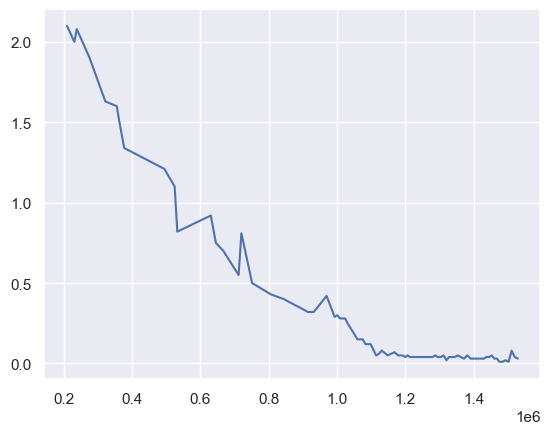

In [16]:
%matplotlib inline
(b3_data[ b3_data['cod_negociacao']=='ABEVH140']['preco_ultimo_negocio']).plot();

In [17]:
#@markdown teste
r = 0.01
S = 15
k = 17
T = 240/365
sigma= 0.3
from scipy.stats import norm

def blackScholes(r, S, k, T, sigma, type="C"):
    
    d1=(np.log(S/k)+ (r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2= d1- sigma*np.sqrt(T)

    if type=="C":
            price= S*norm.cdf(d1,0,1) - k*np.exp(-r*T)*norm.cdf(d2,0,1) #accumlative distribution function
            print("Call calculated")
    elif type =="P":
            price = k*np.exp(-r*T)*norm.cdf(-d2,0,1) - S*norm.cdf(-d1,0,1)
            print("Put calculated")
    return price

        

print("Black Shcoles Working:", round(blackScholes(r, S, k, T, sigma, type="C"),2))

print("Black Shcoles Working:", round(blackScholes(r, S, k, T, sigma, type="P"),2))

Call calculated
Black Shcoles Working: 0.78
Put calculated
Black Shcoles Working: 2.67
